In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline   
plt.rcParams['image.cmap'] = 'gray'

In [2]:
def gen_mnist_image(X):
    return np.rollaxis(np.rollaxis(X[0:200].reshape(20, -1, 28, 28), 0, 2), 1, 3).reshape(-1, 20 * 28)

In [3]:
train = pd.read_csv('/Users/Kevin/Files/Thinkful/Data Files/sign-language-mnist/sign_mnist_train.csv').values[:,1:]
X_train = (train - np.min(train, 0)) / (np.max(train, 0) + 0.0001)  # 0-1 scaling

test = pd.read_csv('/Users/Kevin/Files/Thinkful/Data Files/sign-language-mnist/sign_mnist_test.csv').values[:,1:]
X_test = (test - np.min(test, 0)) / (np.max(test, 0) + 0.0001)  # 0-1 scaling

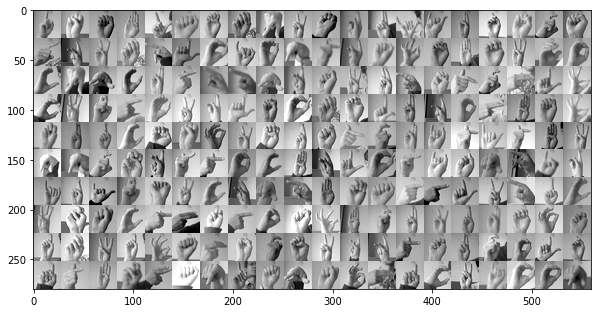

In [4]:
plt.figure(figsize=(10,20))
plt.imshow(gen_mnist_image(X_train));

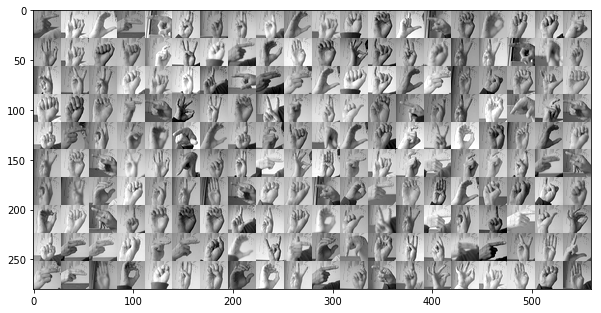

In [5]:
plt.figure(figsize=(10,20))
plt.imshow(gen_mnist_image(X_test));

In [6]:
from sklearn.neural_network import BernoulliRBM
rbm = BernoulliRBM(n_components=100, learning_rate=0.01, random_state=0, verbose=True)
rbm.fit(X_train)

[BernoulliRBM] Iteration 1, pseudo-likelihood = -486.11, time = 5.03s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -479.02, time = 5.25s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -472.76, time = 5.34s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -470.58, time = 5.47s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -467.28, time = 5.46s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -466.39, time = 5.46s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -468.56, time = 5.46s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -464.15, time = 5.43s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -462.05, time = 5.50s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -464.24, time = 5.38s


BernoulliRBM(batch_size=10, learning_rate=0.01, n_components=100, n_iter=10,
       random_state=0, verbose=True)

In [7]:
xx = X_train[:40].copy()
for ii in range(1000):
    for n in range(40):
        xx[n] = rbm.gibbs(xx[n])

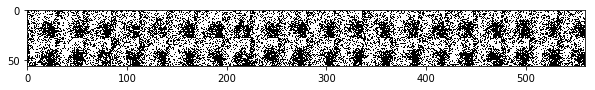

In [8]:
plt.figure(figsize=(10,20))
plt.imshow(gen_mnist_image(xx))

In [9]:
xx = X_train[:40].copy()
for ii in range(10000):
    for n in range(40):
        xx[n] = rbm.gibbs(xx[n])

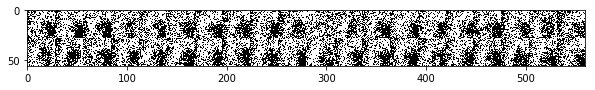

In [10]:
plt.figure(figsize=(10,20))
plt.imshow(gen_mnist_image(xx))

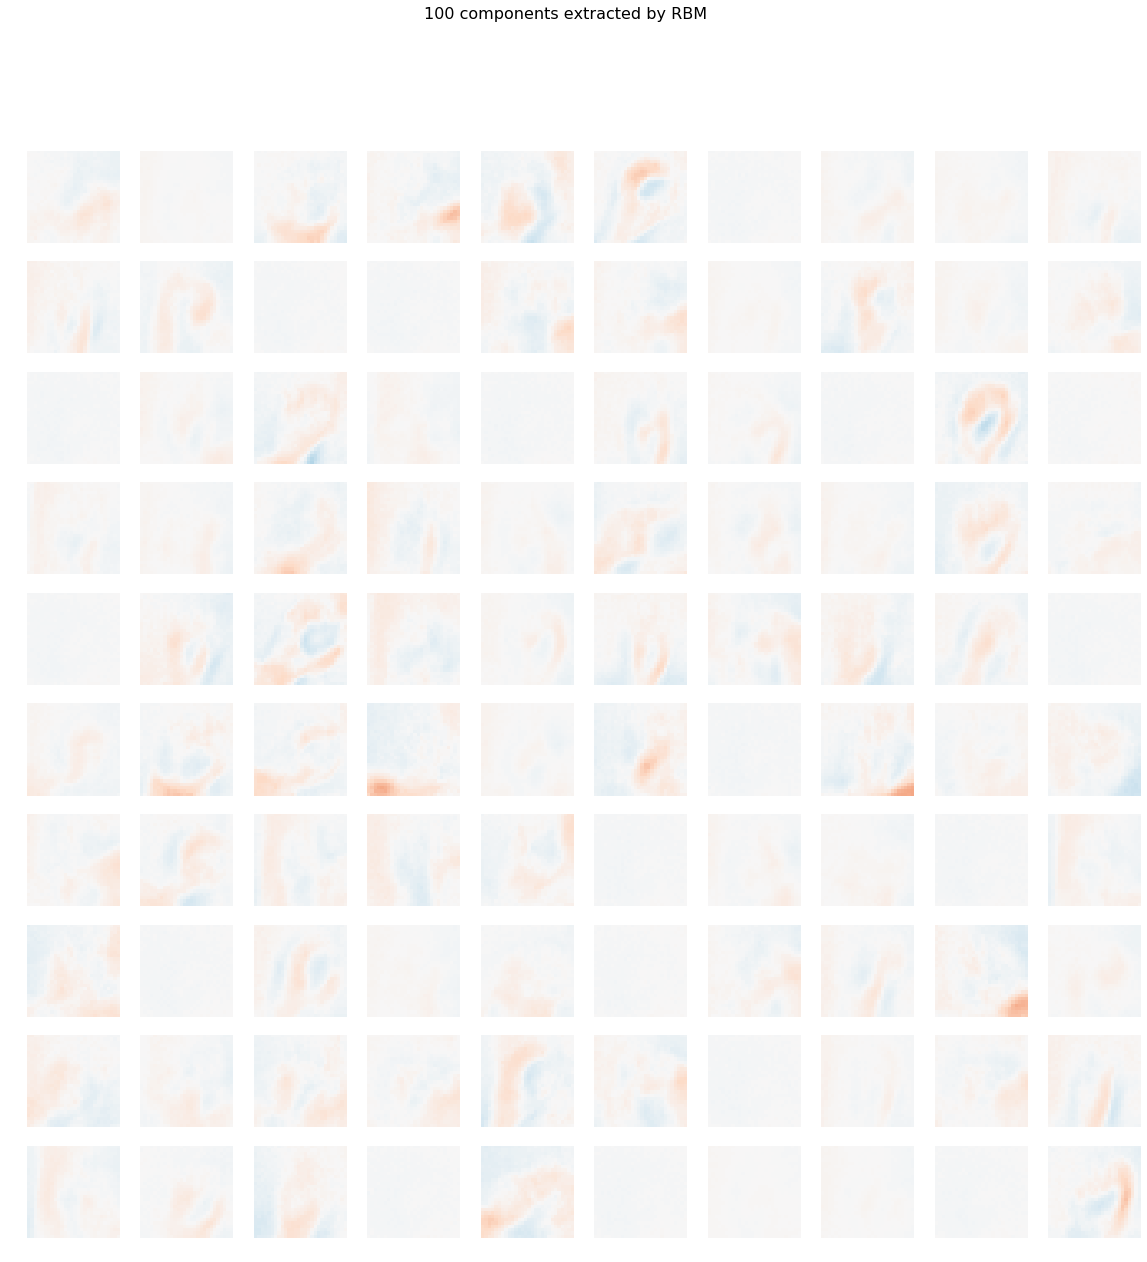

In [11]:
plt.figure(figsize=(20, 20))
for i, comp in enumerate(rbm.components_):
    plt.subplot(10, 10, i + 1)
    plt.imshow(comp.reshape((28, 28)), cmap=plt.cm.RdBu,
               interpolation='nearest', vmin=-2.5, vmax=2.5)
    plt.axis('off')
plt.suptitle('100 components extracted by RBM', fontsize=16);